<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module3/AStar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A* Search**

* A* Search is an **informed best-first search algorithm** that efficiently determines the lowest cost path between any two nodes in a directed weighted graph with non-negative edge weights.

* This algorithm is a variant of Dijkstra's algorithm. A slight difference arises from the fact that an evaluation function is used to determine which node to explore next.

* The **evaluation function**, f(x), for the A* search algorithm is the following: **f(n) = g(n) + h(n)**

* Here, **g(n**) represents the cost to get to noden and **h(n)** represents the estimated cost to arrive at the goal node from node n.

* For the algorithm to generate the correct result, the evaluation function must be **admissible**, meaning that it never overestimates the cost to arrive at the goal node.

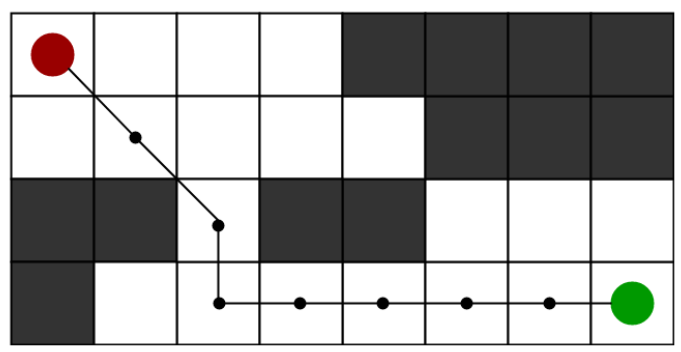



# **The Algorithm**

* The A* algorithm is implemented in a similar way to Dijkstra's algorithm. Given a weighted graph with non-negative edge weights, to find the lowest-cost path from a start node S to a goal node G, two lists are used:

> 1. An **open list**, implemented as a priority queue, which stores the next nodes to be explored. Because this is a priority queue, the most promising candidate node (the one with the lowest value from the evaluation function) is always at the top. Initially, the only node in this list is the start node S.


> 2. A **closed list** which stores the nodes that have already been evaluated. When a node is in the closed list, it means that the lowest-cost path to that node has been found.

* To find the lowest cost path, a search tree is constructed in the following way:
> * Initialize a tree with the root node being the start node S.
> * Remove the top node from the open list for exploration.
> * Add the current node to the closed list.
> * Add all nodes that have an incoming edge from the current node as child nodes in the tree.
> * Update the lowest cost to reach the child node.
> * Compute the evaluation function for every child node and add them to the open list.

In [35]:

class AStar:

    def __init__(self, adjacency_list, h_list):
        self.adjacency_list = adjacency_list
        self.h_list = h_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    # heuristic function for all nodes
    def get_h(self, n):
        return self.h_list[n]

    def run_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but whose neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and whose neighbors have been inspected

        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.get_h(v) < g[n] + self.get_h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

# **Example Graph 1:**

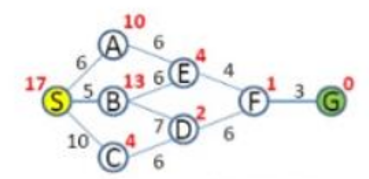

In [43]:
adjacency_list1 = {
    'S': [('A', 6), ('B', 5), ('C',6)],
    'A': [('E', 6)],
    'B': [('E', 6), ('D', 7)],
    'C': [('D', 6)],
    'D': [('F', 6)],
    'E': [('F', 4)],
    'F': [('G', 3)]
}

# experiment with 0 costs
adjacency_list2 = {
    'S': [('A', 0), ('B', 0), ('C', 0)],
    'A': [('E', 0)],
    'B': [('E', 0), ('D', 0)],
    'C': [('D', 0)],
    'D': [('F', 0)],
    'E': [('F', 0)],
    'F': [('G', 0)]
}

# h1() values for nodes
h1_list  = {
            'S': 17,
            'A': 10,
            'B': 13,
            'C': 4,
            'D': 2,
            'E': 4,
            'F': 1,
            'G': 0
        }


# experiment with 0 heuristics
# h2() values for nodes
h2_list  = {
            'S': 0,
            'A': 0,
            'B': 0,
            'C': 0,
            'D': 0,
            'E': 0,
            'F': 0,
            'G': 0
        }

# Set up the graph and its parameters
astar = AStar(adjacency_list1, h1_list)

# find the optimum path from 'S' to 'G'
astar.run_algorithm('S', 'G')



Path found: ['S', 'B', 'E', 'F', 'G']


['S', 'B', 'E', 'F', 'G']

# **Example: Graph 2**

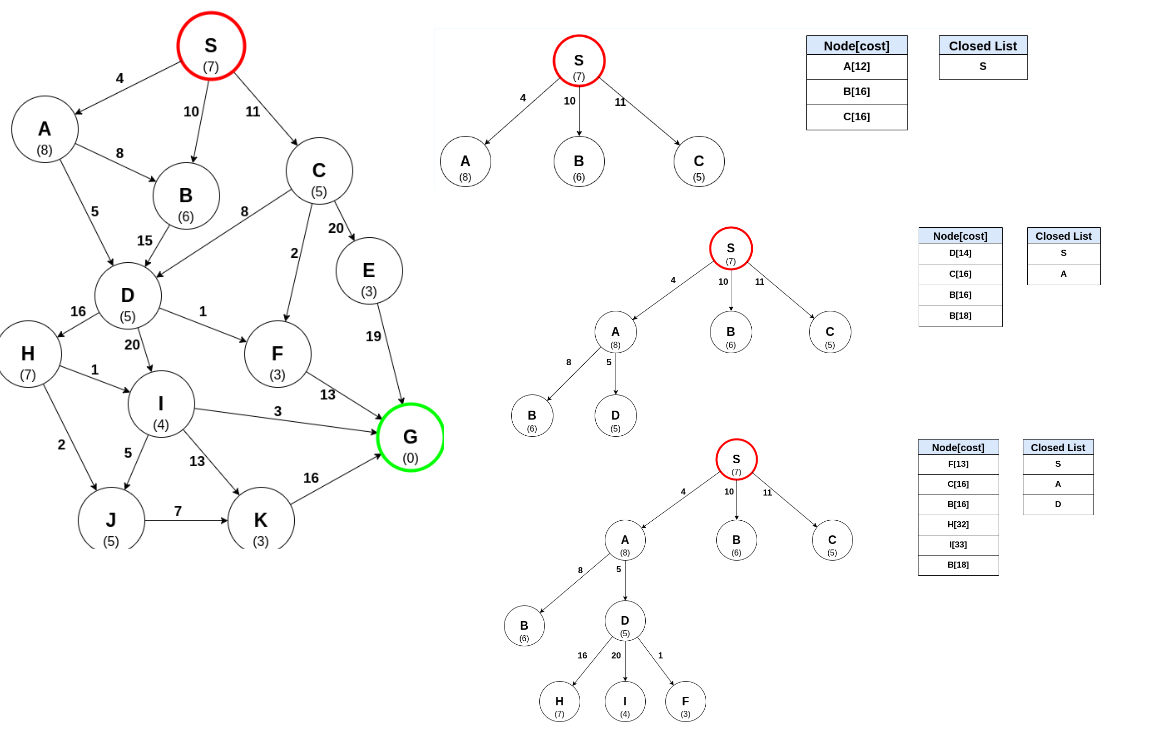

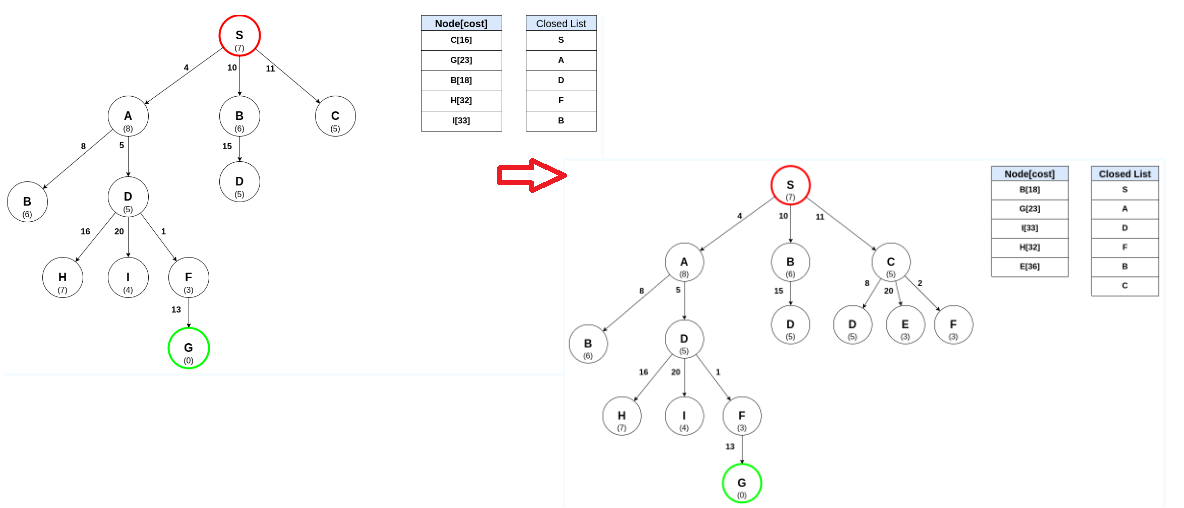

* Finally, the next node to be explored is the goal node G, meaning the shortest path to G has been found.

* The path is constructed by tracing the graph backward from G to S:



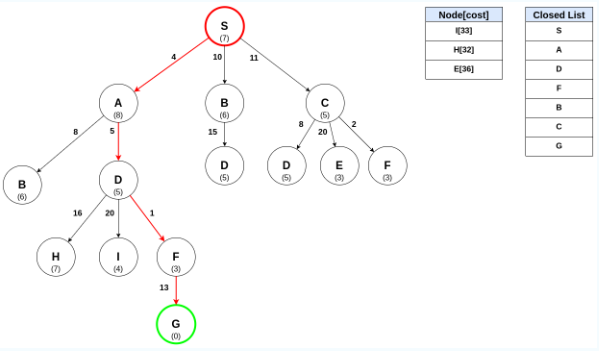

In [48]:
adjacency_list3 = {
    'S': [('A', 4), ('B', 10), ('C', 11)],
    'A': [('B', 1), ('D', 5)],
    'B': [('D', 15)],
    'C': [('D', 8), ('E', 20), ('F', 2)],
    'D': [('H', 16), ('I', 20), ('F', 1)],
    'E': [('G', 19)],
    'F': [('G', 13)],
    'H': [('I', 1), ('J', 2)],
    'I': [('G', 3), ('K', 13), ('G', 3)],
    'J': [('K', 7)],
    'K': [('G', 16)]
}

# h() values for nodes
h3_list  = {
            'S': 7,
            'A': 8,
            'B': 6,
            'C': 5,
            'D': 5,
            'E': 3,
            'F': 3,
            'H': 7,
            'I': 4,
            'J': 5,
            'K': 3,
            'G': 0
        }

# Set up the graph and its parameters
astar = AStar(adjacency_list3, h3_list)

# find the optimum path from 'S' to 'G'
astar.run_algorithm('S', 'G')


Path found: ['S', 'A', 'D', 'F', 'G']


['S', 'A', 'D', 'F', 'G']